In [1]:
import findspark
findspark.init()

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import pandas.io.sql as psql
import seaborn as sns
import numpy as np
import pyspark
from pyspark.sql import SparkSession
import datetime as dt

In [2]:
spark = SparkSession.builder.master("local[1]").appName('Credit_card.com').getOrCreate()

In [3]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='password',
    database='creditcard_capstone'
)

In [4]:
cursor = connection.cursor()

In [5]:
sql = "SELECT * FROM cdw_sapp_credit_card"
cursor.execute(sql)
result_set = cursor.fetchall()
data_frame = psql.read_sql(sql, con=connection)
pd.set_option("display.max_columns", None)
#print(data_frame.head())

C:\Users\Learner_XZHCG225\AppData\Local\Temp\ipykernel_24712\2104550781.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_frame = psql.read_sql(sql, con=connection)


In [ ]:
data_frame

In [7]:
cursor.close()
connection.close()

In [8]:
spark_df = spark.createDataFrame(data_frame)

C:\Spark\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


plot the top three months with the largest transaction data.

In [ ]:
spark_df = spark_df.select('TIMEID', 'TRANSACTION_VALUE')
panda_df = spark_df.toPandas()
panda_df["month"] = pd.to_datetime(panda_df["TIMEID"],format='%Y%m%d').dt.month
print(panda_df['month'])

0        12
1        12
2        11
3         1
4         8
         ..
46689     5
46690     9
46691     7
46692     3
46693    10
Name: month, Length: 46694, dtype: int64
    month  TRANSACTION_VALUE
0       1          196568.87
1       2          201086.67
2       3          196488.59
3       4          194203.25
4       5          201310.26
5       6          195468.74
6       7          201199.35
7       8          196453.41
8       9          196069.44
9      10          202583.89
10     11          200549.36
11     12          201251.08
    month  TRANSACTION_VALUE
4       5          201310.26
9      10          202583.89
11     12          201251.08


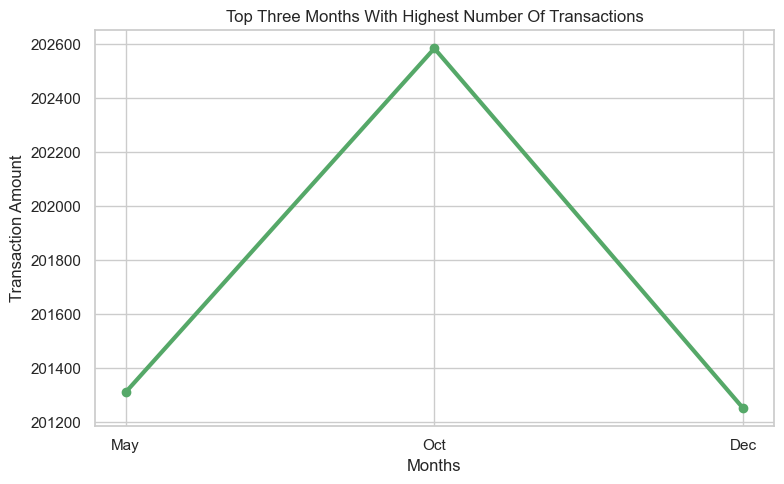

In [139]:
spark_df = spark_df.select('TIMEID', 'TRANSACTION_VALUE')
panda_df = spark_df.toPandas()
panda_df["month"] = pd.to_datetime(panda_df["TIMEID"],format='%Y%m%d').dt.month
print(panda_df['month'])

df_months = panda_df.groupby('month')['TRANSACTION_VALUE'].sum().reset_index()
print(df_months)
df_months = df_months.sort_values(by=['TRANSACTION_VALUE'], ascending=False)
#df_months = df_months.sort_values(by=['month'])
df_months = df_months[:3]
df_months = df_months.sort_values(by=['month'],ascending=True)
print(df_months)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
x = ['May','Oct','Dec']
#y = [196568.87,201086.67,196488.59,194203.25,201310.26,195468.74,201199.35,196453.41,196069.44,202583.89,200549.36,201251.08]
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, df_months['TRANSACTION_VALUE'], ls='-', c='g', lw='3', marker='o')
plt.title('Top Three Months With Highest Number Of Transactions')
plt.xticks(default_x_ticks,x)
plt.ylabel('Transaction Amount')
plt.xlabel('Months')
plt.show()

In [ ]:
spart_df = spark_df.select('TIMEID', 'TRANSACTION_VALUE')
panda_df = spart_df.toPandas()
panda_df["month"] = pd.to_datetime(panda_df["TIMEID"],format='%Y%m%d').dt.month
print(panda_df['month'])

df_months = panda_df.groupby('month')['TRANSACTION_VALUE'].sum().reset_index()
print(df_months)
df_months = df_months.sort_values(by=['TRANSACTION_VALUE'], ascending=False)

df_months = df_months[:3]
df_months = df_months.sort_values(by=['month'],ascending=True)
df_months
sns.set(rc={"figure.figsize":(5,6)})
sns.set_theme(style="whitegrid", palette="hls")
ax = sns.barplot(x ='month',
            y ='TRANSACTION_VALUE',
            hue='TRANSACTION_VALUE',
            dodge=False,
            data =df_months).set(title ="top three months with the largest transaction data.",xlabel= "")
plt.show()


In [ ]:
my_colors = ['lightblue','lightsteelblue','silver']
plt.pie(df_months["TRANSACTION_VALUE"], labels=df_months["TIMEID"], autopct='%1.0f%%',colors=my_colors)
plt.title('Top Three Months With Highest Number Of Transactions')
plt.xlabel('YEAR_MONTH_DAY')
plt.ylabel('Transaction Value')
plt.show()


In [ ]:
df_months.plot(kind='bar', x='TIMEID',rot=0, y='TRANSACTION_VALUE', figsize = (4,5))
plt.title('Top Three Months With Highest Number Of Transactions')
plt.xlabel('Year_Month_Day')
plt.ylabel('Transaction Amount')
plt.show()

In [28]:
spark_df = spark.createDataFrame(data_frame)

C:\Spark\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


 plot which branch processed the highest total dollar value of healthcare transactions.

In [19]:
spark_df = spark_df.select('BRANCH_CODE', 'TRANSACTION_VALUE').filter(spark_df.TRANSACTION_TYPE == 'Healthcare')
panda_df = spark_df.toPandas()
df = panda_df.groupby('BRANCH_CODE')['TRANSACTION_VALUE'].sum().reset_index()
df = df.sort_values(by=['TRANSACTION_VALUE'], ascending=False)
df = df[:5]
df_top5 = df.sort_values(by=['BRANCH_CODE'],ascending=True)
print(df)

    BRANCH_CODE  TRANSACTION_VALUE
22           25            4370.18
53           60            4072.04
69           83            4003.37
31           36            3823.87
83          111            3720.27


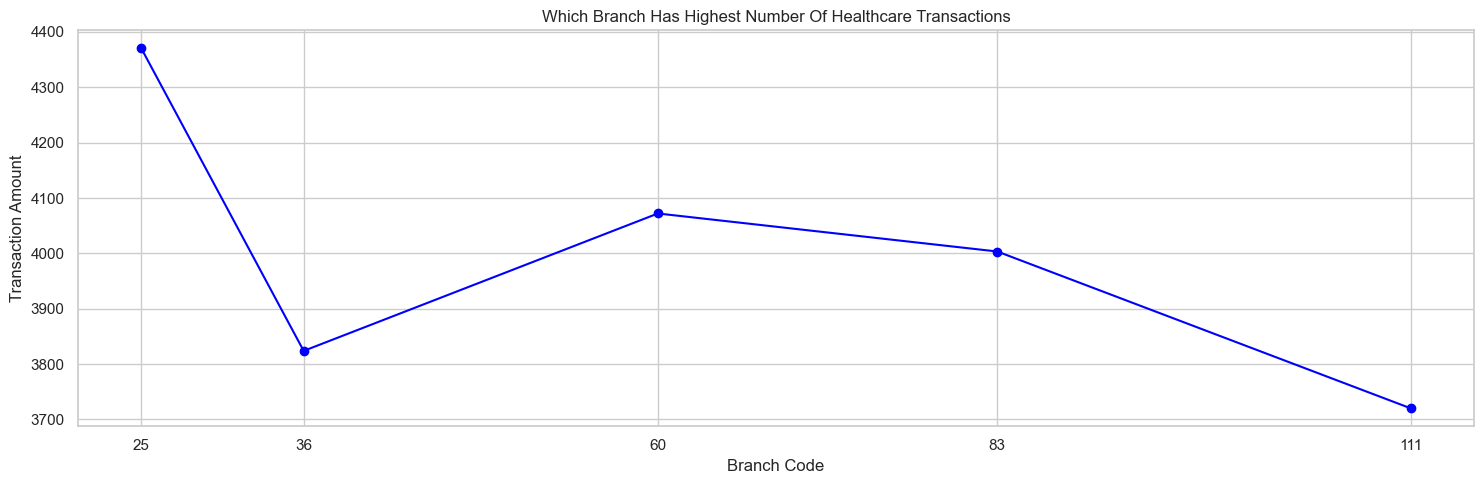

In [173]:

plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(df['BRANCH_CODE'], df['TRANSACTION_VALUE'], ls='-', c='blue', marker='o')
plt.xticks(df['BRANCH_CODE'])
plt.title('Which Branch Has Highest Number Of Healthcare Transactions')
plt.ylabel('Transaction Amount')
plt.xlabel('Branch Code')
plt.show()

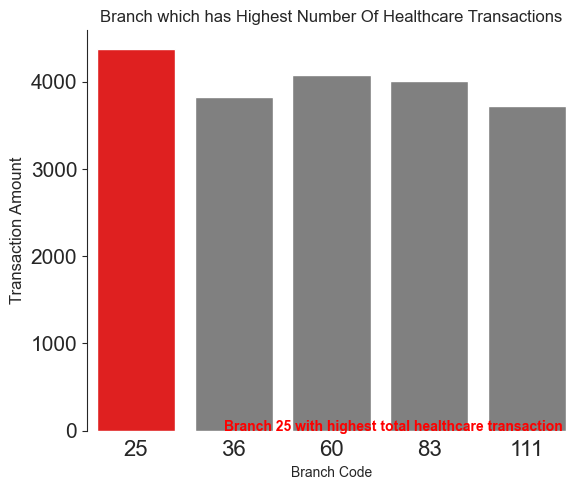

In [26]:
top_five = df_top5['TRANSACTION_VALUE']
colors = ['grey' if (s < max(top_five)) else 'red' for s in top_five]

fig, ax = plt.subplots(figsize=(6,5))
sns.set_style('white')
ax=sns.barplot(x='BRANCH_CODE', y='TRANSACTION_VALUE',
               data=df_top5, palette=colors)
plt.title('Branch which has Highest Number Of Healthcare Transactions', fontsize=12)
plt.xlabel('Branch Code')
plt.xticks(fontsize=16)
plt.ylabel('Transaction Amount', fontsize=12)
plt.yticks(fontsize=15)
ax.text(x=0.9, y=0.9, s='Branch 25 with highest total healthcare transaction',
        color='red', size=10, weight='bold')
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.show()

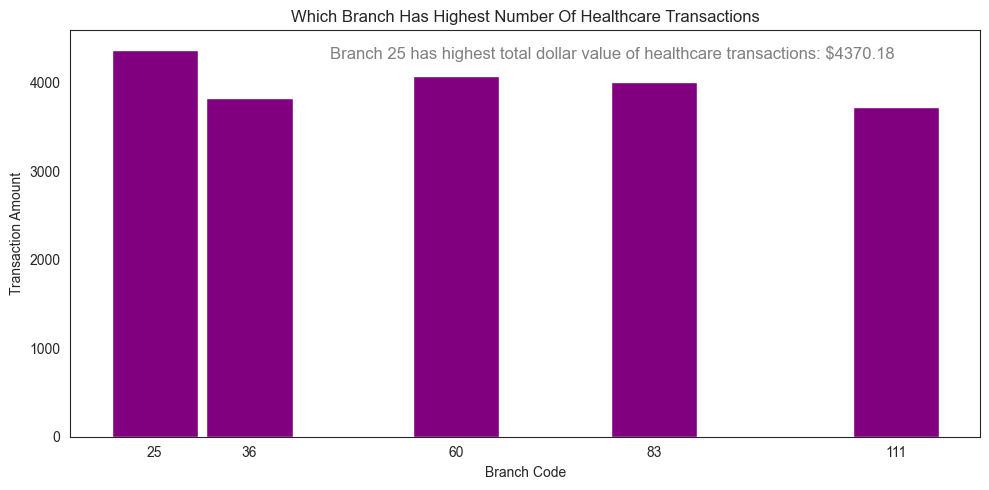

In [24]:
#plt.rcParams["figure.figsize"] = [15, 5]
#plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize = (10, 5))
plt.bar(df['BRANCH_CODE'],df['TRANSACTION_VALUE'] , color ='purple', width = 10)
plt.xticks(df['BRANCH_CODE'])
plt.title('Which Branch Has Highest Number Of Healthcare Transactions')
plt.ylabel('Transaction Amount')
plt.xlabel('Branch Code')
fig.text(0.9, 0.9, 'Branch 25 has highest total dollar value of healthcare transactions: $4370.18', fontsize = 12,
      color ='grey', ha ='right', va ='top',
         alpha = 1.0)
plt.show()

Find and plot which transaction type has a high rate of transactions.

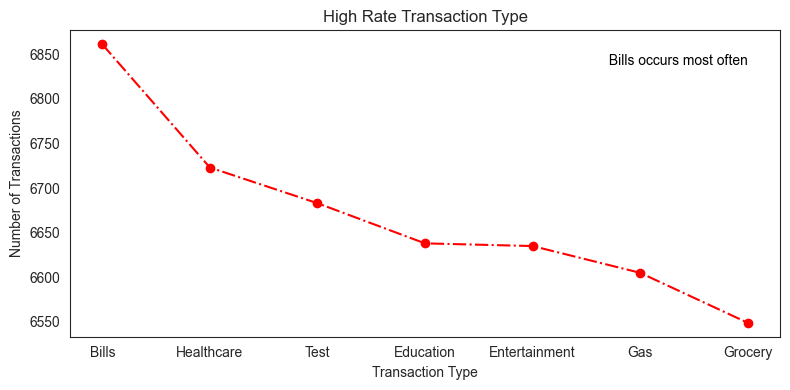

In [34]:

spark_df = spark_df.select('TRANSACTION_TYPE')
pandas_df = spark_df.toPandas()
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
plt.plot(pandas_df['TRANSACTION_TYPE'].value_counts(), ls='-.', c='r', marker='o')
plt.title('High Rate Transaction Type')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')
plt.text(6, 6850, ' Bills occurs most often', fontsize = 10,
      color ='black', ha ='right', va ='top',
         alpha = 1.0)
#plt.text(4, 6850, 'Bills occurs most often')  # see note below
plt.show()